In [1]:
import pandas as pd
import numpy as np

In [2]:
df_update_all_num= pd.read_csv('df_update_all_num.csv').fillna(0)

In [3]:
import matplotlib.pyplot as plt
import xgboost as xgb
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [4]:
feature_names = list(df_update_all_num.drop(columns=['salary']).columns)

In [40]:
X = df_update_all_num[feature_names]
y = df_update_all_num['salary']

data_dmatrix=xgb.DMatrix(data=X, label=y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=123)

xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)

xgb_model.fit(X, y)

y_pred = xgb_model.predict(X)

mse=mean_squared_error(y, y_pred)

print('RMSE:',np.sqrt(mse))

params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

/Users/jz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

/Users/jz/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning:

Series.base is deprecated and will be removed in a future version



RMSE: 23604.56983078543


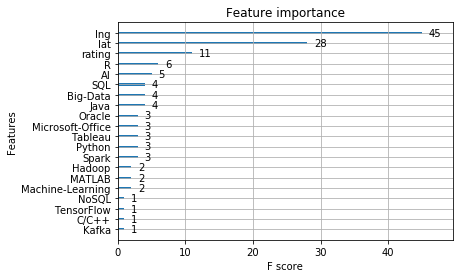

In [6]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

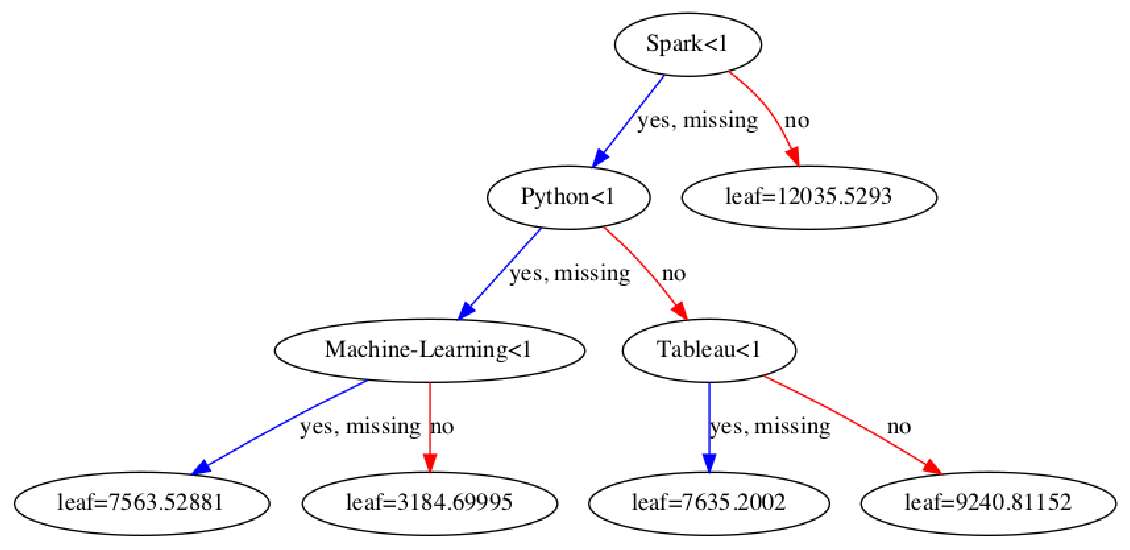

In [7]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

In [50]:
y_pred_com = pd.DataFrame(
    {'y': y,
     'y_pred': y_pred
    })
y_pred_com

y        y_pred
0      63473.0  78285.945312
1      88390.0  79063.265625
2      65000.0  77728.312500
3     115000.0  76247.453125
4      54000.0  69913.843750
...        ...           ...
1487   55650.4  64674.195312
1488   60819.2  64674.195312
1489   99000.0  80092.875000
1490   58073.6  66230.937500
1491   85787.0  88376.250000

[1492 rows x 2 columns]

In [53]:
import plotly.graph_objects as go


fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=np.arange(0,1492), y=y_pred_com['y_pred'],
                    mode='markers',
                    name='y_pred'))
fig.add_trace(go.Scatter(x=np.arange(0,1492), y=y_pred_com['y'],
                    mode='markers',
                    name='y'))
fig.show()

In [41]:
import pickle
pickle.dump(xgb_model, open('final_prediction.pickle', 'wb'))

In [45]:
xgb_model_loaded = pickle.load(open('final_prediction.pickle', "rb"))

In [49]:
xgb_model_loaded.predict(X[:1])

array([78285.945], dtype=float32)